# Use CNN and Keras to classify dogs and cats 

* References: <br>
[1] Kaggle Dogs vs. Cats, https://www.kaggle.com/c/dogs-vs-cats <br>
[2] Jason Brownlee, https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/ <br>
[3] Rohit G., https://www.kaggle.com/code/rohitgadhwar/image-classification-using-cnn-transfer-learning <br>

### Seperate the datasets 
* Training dataset 75% and testing dataset 25%

In [35]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import time 

dataset_home = r'dataset_dogs_vs_cats/' 
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

seed(1)
val_ratio = 0.25
src_directory = 'dogs-vs-cats\\train\\train'

time1 = time.time() 

for file in listdir(src_directory): #...................................................

	src = src_directory + '/' + file
	dst_dir = 'train/'

	if random() < val_ratio:
		dst_dir = 'test/'

	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)

	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

print("> After creating test and train folder time = {}".format(time.time() - time1))

> After creating test and train folder time = 16.18844699859619


### Define CNN the Model

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
> Start fit time = 0.6030058860778809
> steps_per_epoch=293
> Start evaluate time = 10737.751050710678
> Accuracy: 90.750
> Loss: 22.811
> Start summarize time = 10745.252287626266
> End time = 10745.3985850811


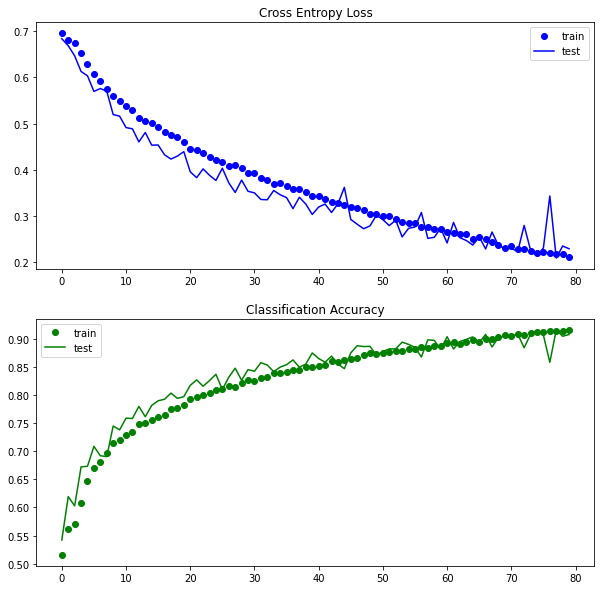

In [36]:
import sys
from matplotlib import pyplot
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
# from keras.optimizers import gradient_descent_v2
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import time 


def define_model_1():                                   
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

def define_model_2():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

def summarize_diagnostics(history):
    pyplot.figure(figsize=(10,10))
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], 'bo', label='train')
    pyplot.plot(history.history['val_loss'], 'b', label='test')
    pyplot.legend()

    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], 'go', label='train')
    pyplot.plot(history.history['val_accuracy'], 'g', label='test')
    pyplot.legend()

    filename = "{}".format(time.time())
    pyplot.savefig(filename + '_plot.png')
    # pyplot.close()

def run_model():

    time1 = time.time()

    # model = define_model_1()                           #............................................
    model = define_model_2()

    # train_datagen = ImageDataGenerator(rescale=1.0/255.0)   ##......................................
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                            rotation_range=15, 
                            shear_range=0.1,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            width_shift_range=0.1, 
                            height_shift_range=0.1) 
    

    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', 
        batch_size=64, 
        target_size=(200, 200))

    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', 
        batch_size=64, 
        target_size=(200, 200))

    print("> Start fit time = {}".format(time.time() - time1))

    # fit model
    print("> steps_per_epoch={}".format(len(train_it)))
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=80, verbose=0) ##..........

    model.save('vgg_model.h5')

    print("> Start evaluate time = {}".format(time.time() - time1))

    # evaluate model
    # loss, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> Accuracy: %.3f' % (acc * 100.0))
    print('> Loss: %.3f' % (loss * 100.0))

    print("> Start summarize time = {}".format(time.time() - time1))

    # summary 
    summarize_diagnostics(history)

    print("> End time = {}".format(time.time() - time1))


# Run, fit the model and evaluate 
run_model()    


### Predict new images 

In [30]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
def load_image(filename):
	img = load_img(filename, target_size=(200, 200))
	img = img_to_array(img)
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	# img = img - [123.68, 116.779, 103.939]
	return img
 
def run_predict():
    img = load_image('pictures/cat5c.jpg')
    # img = load_image('dataset_dogs_vs_cats/test/cats/cat.589.jpg')
    # img = load_image('dataset_dogs_vs_cats/test/dogs/dog.103.jpg')
    model = load_model('vgg3_plus_augmented_80epoch_model.h5')
    result = model.predict(img)
    print(result[0])
 
run_predict()

[6.521327e-27]
